In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import plot_confusion_matrix,accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.manifold import TSNE


plt.rcParams.update({'font.size': 14})

In [2]:
df_train = pd.read_csv('../input/pendigits/pendigits-tra.csv')
df_test = pd.read_csv('../input/pendigits/pendigits-tes.csv')
X_train = df_train.iloc[:,:-1].values
y_train = df_train.iloc[:,-1].values
X_test  = df_test.iloc [:,:-1].values
y_test  = df_test.iloc [:,-1].values

In [3]:
# baseline_accuracy = 0
Methods = ['DT','MLP','GB']
baselines = []

# Question1

> We select Decision Trees, MLP, Gradient Boosting

In [4]:
Q1_accuracy_list = []

> Decision Tree

In [5]:
#DecisionTreeClassifier model
DT1 = DecisionTreeClassifier()

#training the model
DT1.fit(X_train, y_train)

#Predicting the Test set results
y_pred = DT1.predict(X_test)

accuracy_DT1=accuracy_score(y_test, y_pred)*100
Q1_accuracy_list.append(accuracy_DT1)
print('Accuracy of the model: {:.2f} %' .format(accuracy_DT1))

Accuracy of the model: 91.94 %


> MLP

In [6]:
#MLP model
MLP1 = MLPClassifier()

#training the model
MLP1.fit(X_train, y_train)

#Predicting the Test set results
y_pred = MLP1.predict(X_test)


accuracy_MLP1=accuracy_score(y_test, y_pred)*100
Q1_accuracy_list.append(accuracy_MLP1)
print('Accuracy of the model: {:.2f} %' .format(accuracy_MLP1))

Accuracy of the model: 96.80 %


> Gradient Boosting

In [7]:
#GradientBoostingClassifier model
GB1 = GradientBoostingClassifier()

#training the model
GB1.fit(X_train, y_train)

#Predicting the Test set results
y_pred = GB1.predict(X_test)


accuracy_GB1 = accuracy_score(y_test, y_pred)*100
Q1_accuracy_list.append(accuracy_GB1)
print('Accuracy of the model: {:.2f} %' .format(accuracy_GB1))

Accuracy of the model: 96.20 %


# Plotting

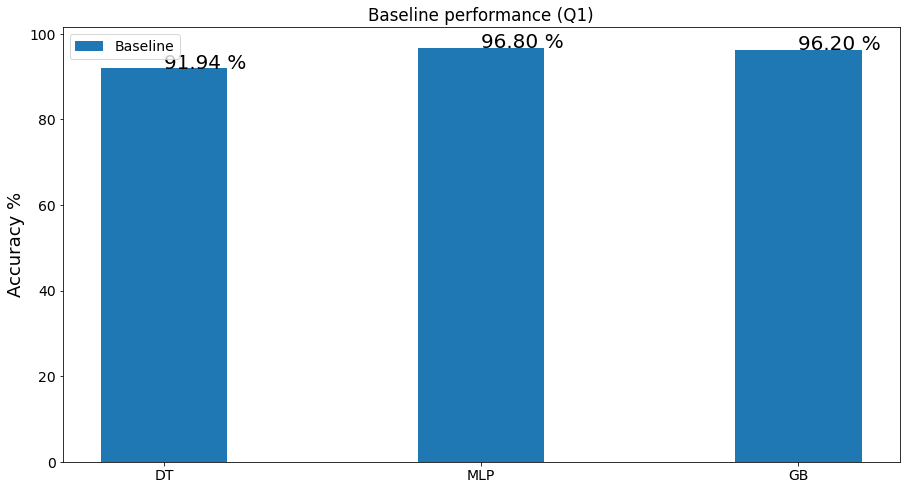

In [8]:
fig = plt.figure(figsize = (15, 8))
plt.bar(Methods,Q1_accuracy_list,width=0.4,label = 'Baseline')
for index,data in enumerate(Q1_accuracy_list):
    plt.text(x=index , y =data , s="{:.2f} %".format(data) , fontdict=dict(fontsize=20))
    
plt.legend()
plt.title('Baseline performance (Q1)')
plt.ylabel("Accuracy %", fontsize=18)

plt.show()

# New Baseline Accuracy

In [9]:
baselines = Q1_accuracy_list
baselines1 = baselines
print(baselines1)

[91.9359450957964, 96.79725478981985, 96.19674006291106]


# Question2

In [10]:
#five features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 5)
X_train_5best_features = chi2_features.fit_transform(X_train, y_train)
X_test_5best_features  = chi2_features.fit_transform(X_test , y_test)

#seven features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 7)
X_train_7best_features = chi2_features.fit_transform(X_train, y_train)
X_test_7best_features  = chi2_features.fit_transform(X_test , y_test)

#ten features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 10)
X_train_10best_features = chi2_features.fit_transform(X_train, y_train)
X_test_10best_features  = chi2_features.fit_transform(X_test , y_test)

In [11]:
bestkFeatures = ['Best 5 features' , 'Best 7 features' , 'Best 10 features']

# DT with K best features

In [12]:
Q2_DT_accuracy_list = []

In [13]:
#DecisionTreeClassifier model
DT2 = DecisionTreeClassifier()

#training the model
DT2.fit(X_train_5best_features, y_train)

#Predicting the Test set results
y_pred = DT2.predict(X_test_5best_features)

accuracy_DT2 = accuracy_score(y_test, y_pred)*100
Q2_DT_accuracy_list.append(accuracy_DT2)
print('Accuracy of the model: {:.2f} %' .format(accuracy_DT2))

Accuracy of the model: 49.87 %


In [14]:
#DecisionTreeClassifier model
DT2 = DecisionTreeClassifier()

#training the model
DT2.fit(X_train_7best_features, y_train)

#Predicting the Test set results
y_pred = DT2.predict(X_test_7best_features)

accuracy_DT3 = accuracy_score(y_test, y_pred)*100
Q2_DT_accuracy_list.append(accuracy_DT3)
print('Accuracy of the model: {:.2f} %' .format(accuracy_DT3))

Accuracy of the model: 60.19 %


In [15]:
#DecisionTreeClassifier model
DT2 = DecisionTreeClassifier()

#training the model
DT2.fit(X_train_10best_features, y_train)

#Predicting the Test set results
y_pred = DT2.predict(X_test_10best_features)

accuracy_DT4 = accuracy_score(y_test, y_pred)*100
Q2_DT_accuracy_list.append(accuracy_DT4)
print('Accuracy of the model: {:.2f} %' .format(accuracy_DT4))

Accuracy of the model: 89.48 %


# Plotting

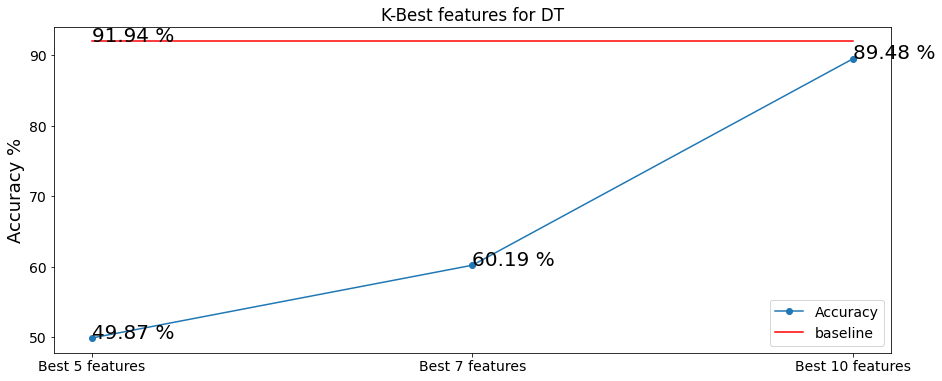

In [16]:
fig = plt.figure(figsize = (15, 6))
plt.plot(bestkFeatures,Q2_DT_accuracy_list, marker='o',label = 'Accuracy')
plt.plot(bestkFeatures , len(bestkFeatures)* [baselines[0]] , color = 'red',label = 'baseline')
plt.text(x=0 , y =baselines[0] , s="{:.2f} %".format(baselines[0]) , fontdict=dict(fontsize=20))  

for index,data in enumerate(Q2_DT_accuracy_list):
    plt.text(x=index , y =data , s="{:.2f} %".format(data) , fontdict=dict(fontsize=20))   
plt.legend()
plt.title('K-Best features for DT')
plt.ylabel("Accuracy %", fontsize=18)

plt.show()

# MLP with K best features

In [17]:
Q2_MLP_accuracy_list = []

In [18]:
#MLP model
MLP2 = MLPClassifier()

#training the model
MLP2.fit(X_train_5best_features, y_train)

#Predicting the Test set results
y_pred = MLP2.predict(X_test_5best_features)


accuracy_MLP2 = accuracy_score(y_test, y_pred)*100
Q2_MLP_accuracy_list.append(accuracy_MLP2)
print('Accuracy of the model: {:.2f} %' .format(accuracy_MLP2))

Accuracy of the model: 49.99 %


In [19]:
#MLP model
MLP2 = MLPClassifier()

#training the model
MLP2.fit(X_train_7best_features, y_train)

#Predicting the Test set results
y_pred = MLP2.predict(X_test_7best_features)


accuracy_MLP3 = accuracy_score(y_test, y_pred)*100
Q2_MLP_accuracy_list.append(accuracy_MLP3)
print('Accuracy of the model: {:.2f} %' .format(accuracy_MLP3))

Accuracy of the model: 67.66 %


In [20]:
#MLP model
MLP2 = MLPClassifier()

#training the model
MLP2.fit(X_train_10best_features, y_train)

#Predicting the Test set results
y_pred = MLP2.predict(X_test_10best_features)


accuracy_MLP4 = accuracy_score(y_test, y_pred)*100
Q2_MLP_accuracy_list.append(accuracy_MLP4)
print('Accuracy of the model: {:.2f} %' .format(accuracy_MLP4))

Accuracy of the model: 93.39 %


# Plotting

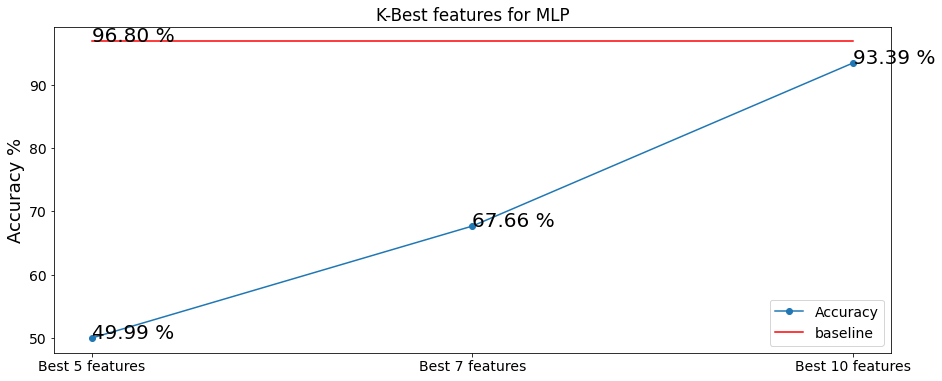

In [21]:
fig = plt.figure(figsize = (15, 6))
plt.plot(bestkFeatures,Q2_MLP_accuracy_list, marker='o',label = 'Accuracy')
plt.plot(bestkFeatures , len(bestkFeatures)* [baselines[1]] , color = 'red',label = 'baseline')
plt.text(x=0 , y =baselines[1] , s="{:.2f} %".format(baselines[1]) , fontdict=dict(fontsize=20))  

for index,data in enumerate(Q2_MLP_accuracy_list):
    plt.text(x=index , y =data , s="{:.2f} %".format(data) , fontdict=dict(fontsize=20))   
plt.legend()
plt.title('K-Best features for MLP')
plt.ylabel("Accuracy %", fontsize=18)

plt.show()

# GB with K best features

In [22]:
Q2_GB_accuracy_list = []

In [23]:
#GradientBoostingClassifier model
GB2 = GradientBoostingClassifier()

#training the model
GB2.fit(X_train_5best_features, y_train)

#Predicting the Test set results
y_pred = GB2.predict(X_test_5best_features)


accuracy_GB2 = accuracy_score(y_test, y_pred)*100
Q2_GB_accuracy_list.append(accuracy_GB2)
print('Accuracy of the model: {:.2f} %' .format(accuracy_GB2))

Accuracy of the model: 57.42 %


In [24]:
#GradientBoostingClassifier model
GB2 = GradientBoostingClassifier()

#training the model
GB2.fit(X_train_7best_features, y_train)

#Predicting the Test set results
y_pred = GB2.predict(X_test_7best_features)


accuracy_GB3 = accuracy_score(y_test, y_pred)*100
Q2_GB_accuracy_list.append(accuracy_GB3)
print('Accuracy of the model: {:.2f} %' .format(accuracy_GB3))

Accuracy of the model: 65.71 %


In [25]:
#GradientBoostingClassifier model
GB2 = GradientBoostingClassifier()

#training the model
GB2.fit(X_train_10best_features, y_train)

#Predicting the Test set results
y_pred = GB2.predict(X_test_10best_features)


accuracy_GB4 = accuracy_score(y_test, y_pred)*100
Q2_GB_accuracy_list.append(accuracy_GB4)
print('Accuracy of the model: {:.2f} %' .format(accuracy_GB4))

Accuracy of the model: 93.54 %


# Plotting

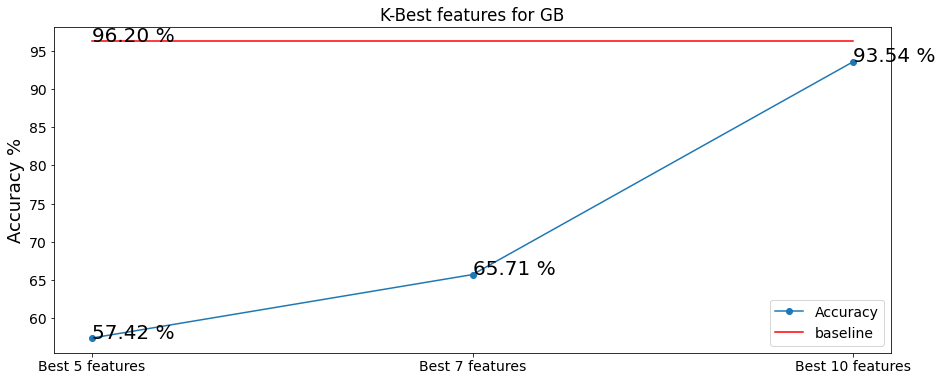

In [26]:
fig = plt.figure(figsize = (15, 6))
plt.plot(bestkFeatures,Q2_GB_accuracy_list, marker='o',label = 'Accuracy')
plt.plot(bestkFeatures , len(bestkFeatures)* [baselines[2]] , color = 'red',label = 'baseline')
plt.text(x=0 , y =baselines[2] , s="{:.2f} %".format(baselines[2]) , fontdict=dict(fontsize=20))  

for index,data in enumerate(Q2_GB_accuracy_list):
    plt.text(x=index , y =data , s="{:.2f} %".format(data) , fontdict=dict(fontsize=20))   
plt.legend()
plt.title('K-Best features for GB')
plt.ylabel("Accuracy %", fontsize=18)

plt.show()

# T-SNE 2D before & after feature selection

In [27]:
tsne = TSNE(n_components=2, verbose=1)

#t-SNE before feature reduction
z = tsne.fit_transform(X_train)
data=pd.DataFrame()
data["target"] = y_train
data["comp-1"] = z[:,0]
data["comp-2"] = z[:,1]

#t-SNE after feature reduction to 5
z_5 = tsne.fit_transform(X_train_5best_features)
data_5=pd.DataFrame()
data_5["target"] = y_train
data_5["comp-1"] = z_5[:,0]
data_5["comp-2"] = z_5[:,1]

#t-SNE after feature reduction to 7
z_7 = tsne.fit_transform(X_train_7best_features)
data_7=pd.DataFrame()
data_7["target"] = y_train
data_7["comp-1"] = z_7[:,0]
data_7["comp-2"] = z_7[:,1]

#t-SNE after feature reduction to 10
z_10 = tsne.fit_transform(X_train_10best_features)
data_10=pd.DataFrame()
data_10["target"] = y_train
data_10["comp-1"] = z_10[:,0]
data_10["comp-2"] = z_10[:,1]


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7493 samples in 0.015s...
[t-SNE] Computed neighbors for 7493 samples in 1.130s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7493
[t-SNE] Computed conditional probabilities for sample 2000 / 7493
[t-SNE] Computed conditional probabilities for sample 3000 / 7493
[t-SNE] Computed conditional probabilities for sample 4000 / 7493
[t-SNE] Computed conditional probabilities for sample 5000 / 7493
[t-SNE] Computed conditional probabilities for sample 6000 / 7493
[t-SNE] Computed conditional probabilities for sample 7000 / 7493
[t-SNE] Computed conditional probabilities for sample 7493 / 7493
[t-SNE] Mean sigma: 10.591536
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.240883
[t-SNE] KL divergence after 1000 iterations: 0.977072
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7493 samples in 0.007s...
[t-SNE] Computed neighbors for 7493 samples in 0.308s...
[t-SNE] Computed conditional

# Plot before Feature Selection

[Text(0.5, 1.0, 't-SNE projection before feature selection')]

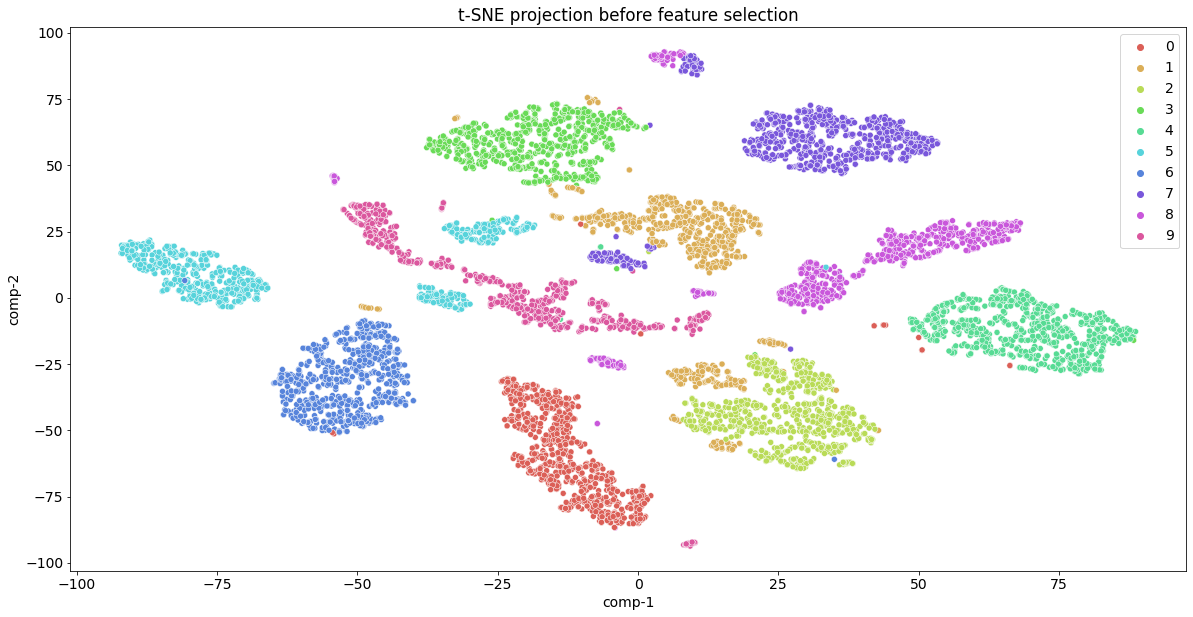

In [28]:
fig = plt.figure(figsize = (20, 10))
sns.scatterplot(x="comp-1", y="comp-2", hue=data.target.tolist(),
                palette=sns.color_palette("hls", 10),
                data=data).set(title="t-SNE projection before feature selection") 

# Plot after 5-best Feature Selection

[Text(0.5, 1.0, 't-SNE projection after 5-best feature selection')]

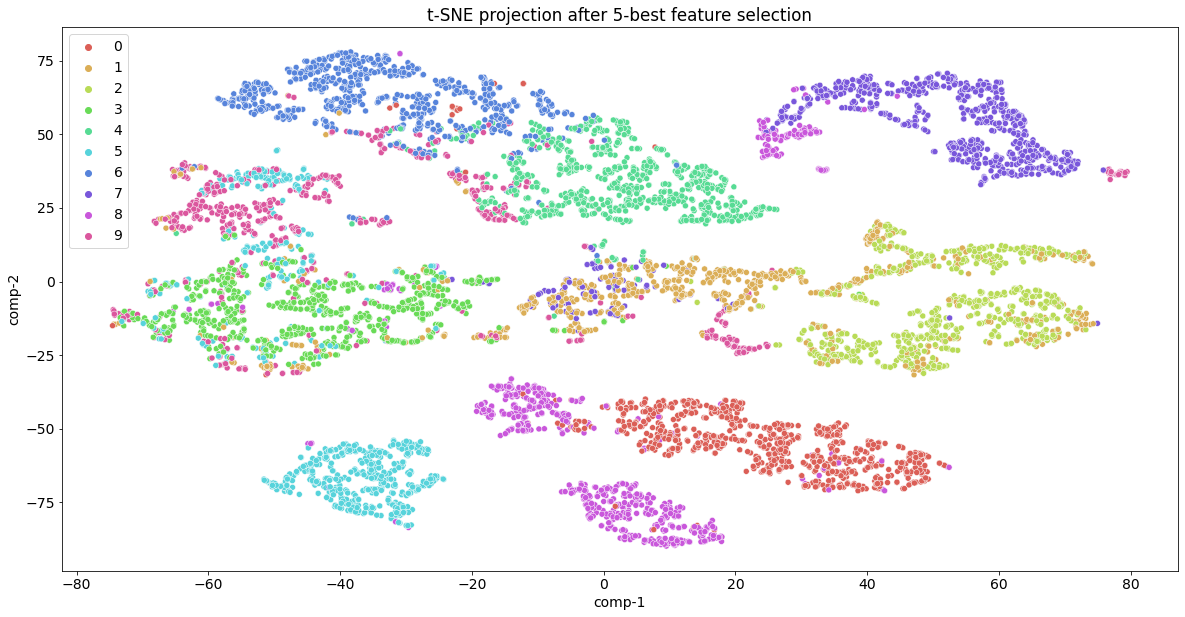

In [29]:
fig = plt.figure(figsize = (20, 10))
sns.scatterplot(x="comp-1", y="comp-2", hue=data_5.target.tolist(),
                palette=sns.color_palette("hls", 10),
                data=data_5).set(title="t-SNE projection after 5-best feature selection") 

# Plot after 7-best Feature Selection

[Text(0.5, 1.0, 't-SNE projection after 7-best feature selection')]

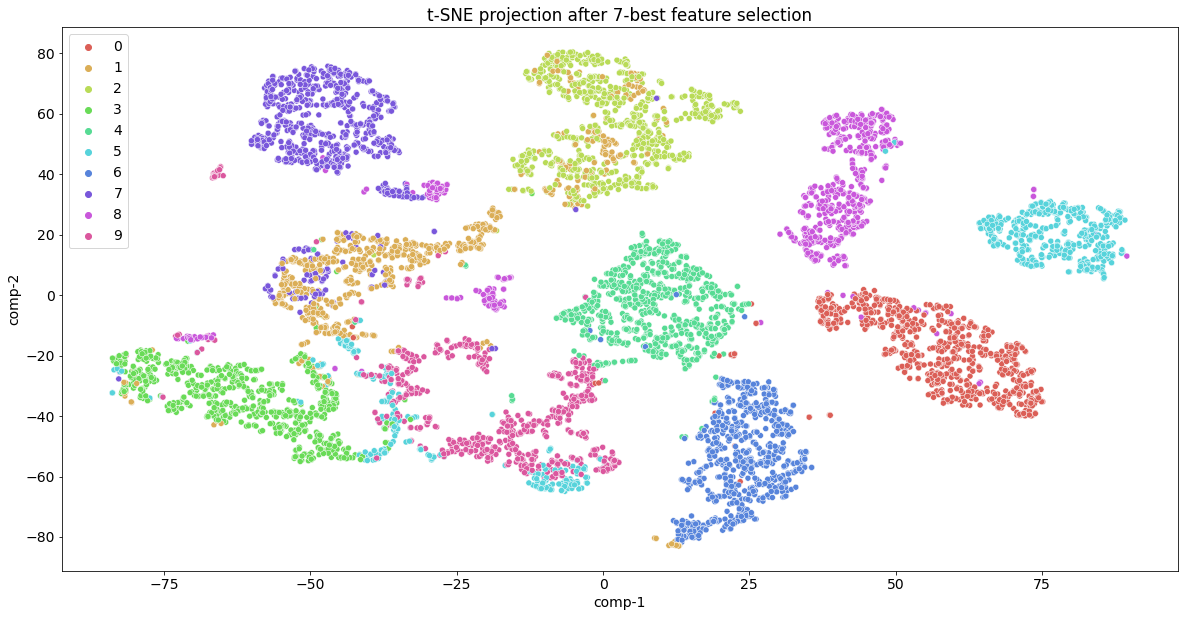

In [30]:
fig = plt.figure(figsize = (20, 10))
sns.scatterplot(x="comp-1", y="comp-2", hue=data_7.target.tolist(),
                palette=sns.color_palette("hls", 10),
                data=data_7).set(title="t-SNE projection after 7-best feature selection") 

# Plot after 10-best Feature Selection

[Text(0.5, 1.0, 't-SNE projection after 10-best feature selection')]

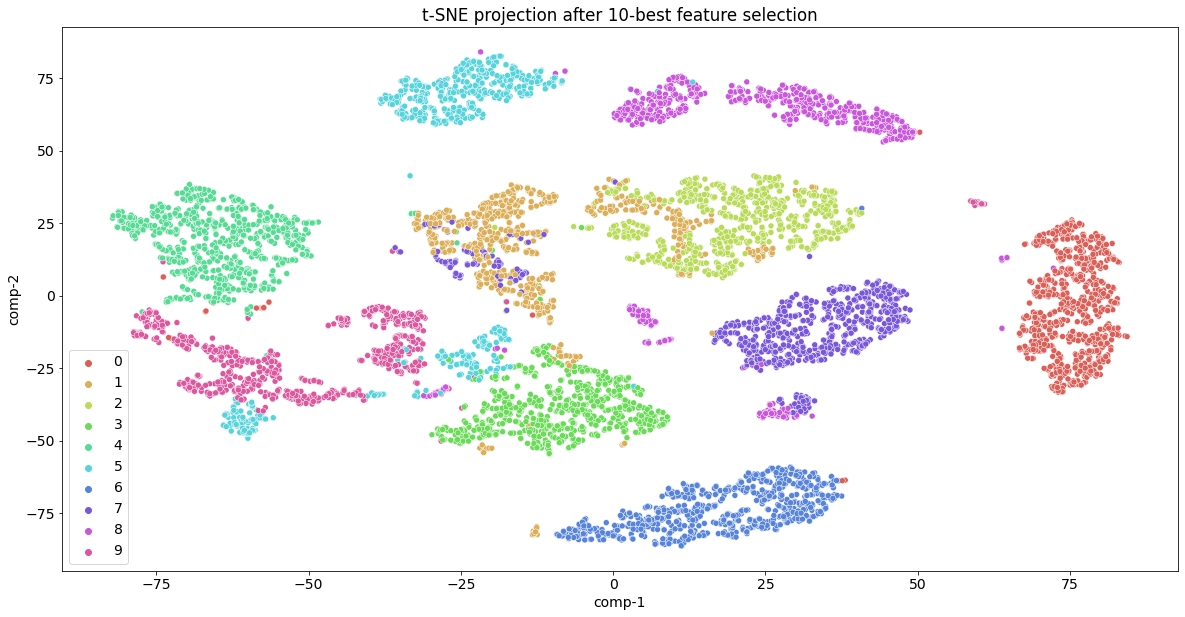

In [31]:
fig = plt.figure(figsize = (20, 10))
sns.scatterplot(x="comp-1", y="comp-2", hue=data_10.target.tolist(),
                palette=sns.color_palette("hls", 10),
                data=data_10).set(title="t-SNE projection after 10-best feature selection") 

# Question3

# New Baseline Accuracy

In [32]:
baselines = [max(baselines[0],max(Q2_DT_accuracy_list)), max(baselines[1],max(Q2_MLP_accuracy_list)),max(baselines[2],max(Q2_GB_accuracy_list))]
baselines

[91.9359450957964, 96.79725478981985, 96.19674006291106]

In [33]:
baselines2 = [max(Q2_DT_accuracy_list) , max(Q2_MLP_accuracy_list) , max(Q2_GB_accuracy_list)]

In [34]:
DT_estimators = {}
MLP_estimators = {}
GB_estimators = {}

# HyperTuning First Parameter

In [35]:
DT_max_depth = [None , 5 , 10 , 15]
GB_n_estimators = [25 , 50 , 75 , 100]
MLP_hidden_layer = [50,100 , 150,200]


> Decision Tree

In [36]:
Q3_DT1_accuracy_list = []
max_depth = []


In [37]:
for i in range(len(DT_max_depth)):
    DT5 = DecisionTreeClassifier(max_depth = DT_max_depth[i])
    max_depth.append(f'Max_depth:{DT_max_depth[i]}')
    #training the model
    DT5.fit(X_train, y_train)

    #Predicting the Test set results
    y_pred = DT5.predict(X_test)

    accuracy_DT5 = accuracy_score(y_test, y_pred)*100
    DT_estimators[accuracy_DT5] = DT5
    Q3_DT1_accuracy_list.append(accuracy_DT5)
    print(f'Accuracy of the model of max_depth {DT_max_depth[i]}: {accuracy_DT5:.2f}')

Accuracy of the model of max_depth None: 91.94
Accuracy of the model of max_depth 5: 76.44
Accuracy of the model of max_depth 10: 90.99
Accuracy of the model of max_depth 15: 92.77


# Plotting

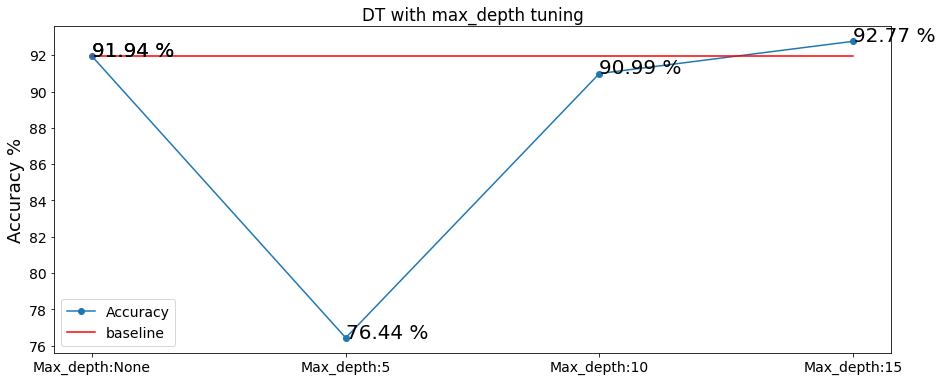

In [38]:
fig = plt.figure(figsize = (15, 6))
plt.plot(max_depth,Q3_DT1_accuracy_list, marker='o',label = 'Accuracy')
plt.plot(max_depth , len(max_depth)* [baselines[0]] , color = 'red',label = 'baseline')
plt.text(x=0 , y =baselines[0] , s="{:.2f} %".format(baselines[0]) , fontdict=dict(fontsize=20))  

for index,data in enumerate(Q3_DT1_accuracy_list):
    plt.text(x=index , y =data , s="{:.2f} %".format(data) , fontdict=dict(fontsize=20))   
plt.legend()
plt.title('DT with max_depth tuning')
plt.ylabel("Accuracy %", fontsize=18)

plt.show()

# Best max_depth value

In [39]:
best_max_depth = DT_max_depth[Q3_DT1_accuracy_list.index(max(Q3_DT1_accuracy_list))]
best_max_depth

15

> MLP

In [40]:
Q3_MLP1_accuracy_list = []
hidden_layers = []

In [41]:
for i in range(len(MLP_hidden_layer)):
    MLP5 = MLPClassifier(hidden_layer_sizes = MLP_hidden_layer[i])
    hidden_layers.append(f'Hidden_layers_size:{MLP_hidden_layer[i]}')
    #training the model
    MLP5.fit(X_train, y_train)

    #Predicting the Test set results
    y_pred = MLP5.predict(X_test)

    accuracy_MLP5 = accuracy_score(y_test, y_pred)*100
    MLP_estimators[accuracy_MLP5] = MLP5
    Q3_MLP1_accuracy_list.append(accuracy_MLP5)
    print(f'Accuracy of the model with hidden layers {MLP_hidden_layer[i]}: {accuracy_DT5:.2f}')

Accuracy of the model with hidden layers 50: 92.77
Accuracy of the model with hidden layers 100: 92.77
Accuracy of the model with hidden layers 150: 92.77
Accuracy of the model with hidden layers 200: 92.77


# Plotting

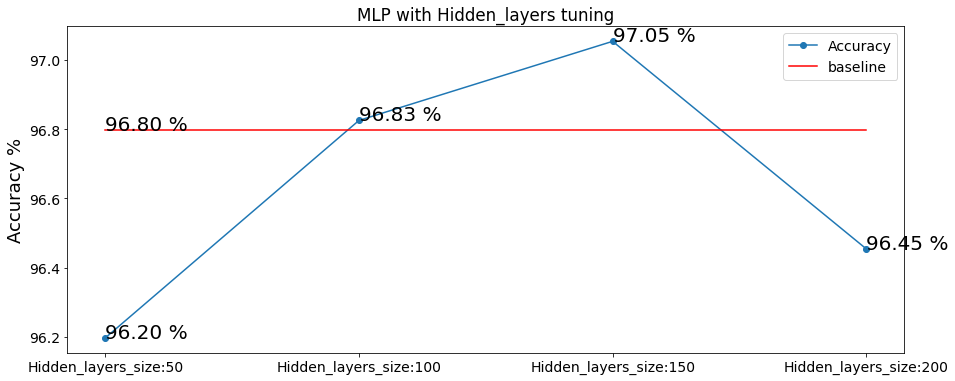

In [42]:
fig = plt.figure(figsize = (15, 6))
plt.plot(hidden_layers,Q3_MLP1_accuracy_list, marker='o',label = 'Accuracy')
plt.plot(hidden_layers , len(hidden_layers)* [baselines[1]] , color = 'red',label = 'baseline')
plt.text(x=0 , y =baselines[1] , s="{:.2f} %".format(baselines[1]) , fontdict=dict(fontsize=20))  

for index,data in enumerate(Q3_MLP1_accuracy_list):
    plt.text(x=index , y =data , s="{:.2f} %".format(data) , fontdict=dict(fontsize=20))   
plt.legend()
plt.title('MLP with Hidden_layers tuning')
plt.ylabel("Accuracy %", fontsize=18)

plt.show()

# Best Hidden Layers Size

In [43]:
best_hidden_layer_size = MLP_hidden_layer[Q3_MLP1_accuracy_list.index(max(Q3_MLP1_accuracy_list))]
best_hidden_layer_size

150

> GB

In [44]:
Q3_GB1_accuracy_list = []
n_estimators = []

In [45]:
for i in range(len(MLP_hidden_layer)):
    GB5 = GradientBoostingClassifier(n_estimators = GB_n_estimators[i])
    n_estimators.append(f'n_estimators:{GB_n_estimators[i]}')
    #training the model
    GB5.fit(X_train, y_train)

    #Predicting the Test set results
    y_pred = GB5.predict(X_test)

    accuracy_GB5 = accuracy_score(y_test, y_pred)*100
    GB_estimators[accuracy_GB5] = GB5
    Q3_GB1_accuracy_list.append(accuracy_GB5)
    print(f'Accuracy of the model with estimators number {GB_n_estimators[i]}: {accuracy_GB5:.2f}')

Accuracy of the model with estimators number 25: 91.42
Accuracy of the model with estimators number 50: 95.00
Accuracy of the model with estimators number 75: 95.91
Accuracy of the model with estimators number 100: 96.20


# Plotting

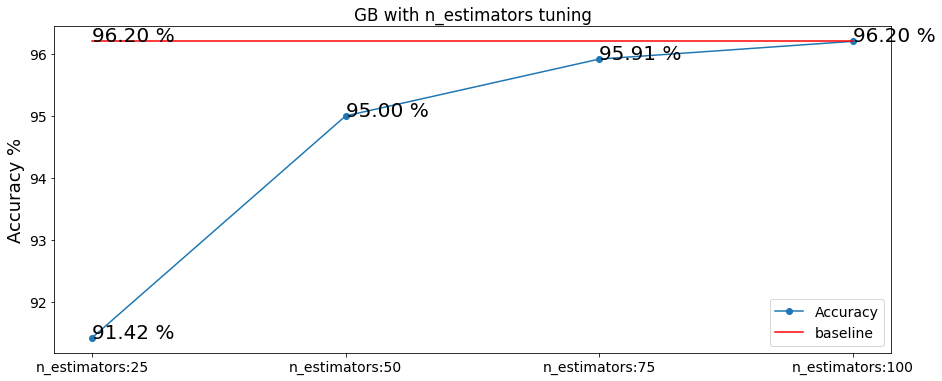

In [46]:
fig = plt.figure(figsize = (15, 6))
plt.plot(n_estimators,Q3_GB1_accuracy_list, marker='o',label = 'Accuracy')
plt.plot(n_estimators , len(n_estimators)* [baselines[2]] , color = 'red',label = 'baseline')
plt.text(x=0 , y =baselines[2] , s="{:.2f} %".format(baselines[2]) , fontdict=dict(fontsize=20))  

for index,data in enumerate(Q3_GB1_accuracy_list):
    plt.text(x=index , y =data , s="{:.2f} %".format(data) , fontdict=dict(fontsize=20))   
plt.legend()
plt.title('GB with n_estimators tuning')
plt.ylabel("Accuracy %", fontsize=18)

plt.show()

In [47]:
best_n_estimators = GB_n_estimators[Q3_GB1_accuracy_list.index(max(Q3_GB1_accuracy_list))]
best_n_estimators

100

# New Baseline Accuracy

In [48]:
baselines = [max(baselines[0],max(Q3_DT1_accuracy_list)), max(baselines[1],max(Q3_MLP1_accuracy_list)),max(baselines[2],max(Q3_GB1_accuracy_list))]
baselines

[92.76522733771804, 97.05461824420932, 96.19674006291106]

# HyperTuning Second Parameter

In [49]:
DT_min_sample_leaf = [1 , 3 , 5 , 7]
MLP_LR = [0.1 , 0.01 , 0.001, 0.0001]
GB_LR = [0.1 , 0.01 , 0.001 , 0.0001]


> DT

In [50]:
Q3_DT2_accuracy_list = []
min_sample_leaf = []

In [51]:
for i in range(len(DT_max_depth)):
    DT6 = DecisionTreeClassifier(max_depth = best_max_depth , min_samples_leaf = DT_min_sample_leaf[i])
    min_sample_leaf.append(f'Min_leaves:{DT_min_sample_leaf[i]}')
    #training the model
    DT6.fit(X_train, y_train)

    #Predicting the Test set results
    y_pred = DT6.predict(X_test)

    accuracy_DT6 = accuracy_score(y_test, y_pred)*100
    DT_estimators[accuracy_DT6] = DT6
    Q3_DT2_accuracy_list.append(accuracy_DT6)
    print(f'Accuracy of the model of min leaves {DT_min_sample_leaf[i]}: {accuracy_DT6:.2f}')

Accuracy of the model of min leaves 1: 91.85
Accuracy of the model of min leaves 3: 91.76
Accuracy of the model of min leaves 5: 90.59
Accuracy of the model of min leaves 7: 89.93


# Plotting

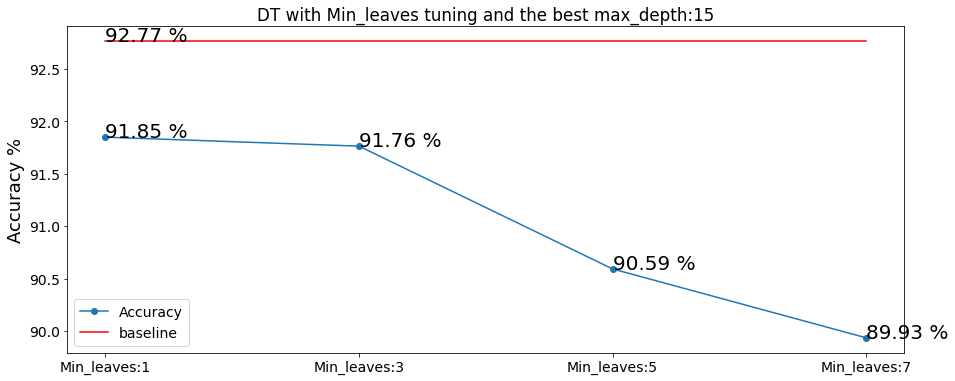

In [52]:
fig = plt.figure(figsize = (15, 6))
plt.plot(min_sample_leaf,Q3_DT2_accuracy_list, marker='o',label = 'Accuracy')
plt.plot(min_sample_leaf , len(min_sample_leaf)* [baselines[0]] , color = 'red',label = 'baseline')
plt.text(x=0 , y =baselines[0] , s="{:.2f} %".format(baselines[0]) , fontdict=dict(fontsize=20))  

for index,data in enumerate(Q3_DT2_accuracy_list):
    plt.text(x=index , y =data , s="{:.2f} %".format(data) , fontdict=dict(fontsize=20))   
plt.legend()
plt.title(f'DT with Min_leaves tuning and the best max_depth:{best_max_depth}')
plt.ylabel("Accuracy %", fontsize=18)

plt.show()

> MLP

In [53]:
Q3_MLP2_accuracy_list = []
mlp2_lr = []

In [54]:
for i in range(len(MLP_hidden_layer)):
    MLP6 = MLPClassifier(hidden_layer_sizes = best_hidden_layer_size ,learning_rate_init = MLP_LR[i])
    mlp2_lr.append(f'Learning Rate:{MLP_LR[i]}')
    #training the model
    MLP6.fit(X_train, y_train)

    #Predicting the Test set results
    y_pred = MLP6.predict(X_test)

    accuracy_MLP6 = accuracy_score(y_test, y_pred)*100
    MLP_estimators[accuracy_MLP6] = MLP6
    Q3_MLP2_accuracy_list.append(accuracy_MLP6)
    print(f'Accuracy of the model with learning rate {MLP_LR[i]}: {accuracy_MLP6:.2f}')

Accuracy of the model with learning rate 0.1: 18.24
Accuracy of the model with learning rate 0.01: 95.57
Accuracy of the model with learning rate 0.001: 97.03
Accuracy of the model with learning rate 0.0001: 97.14


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Plotting

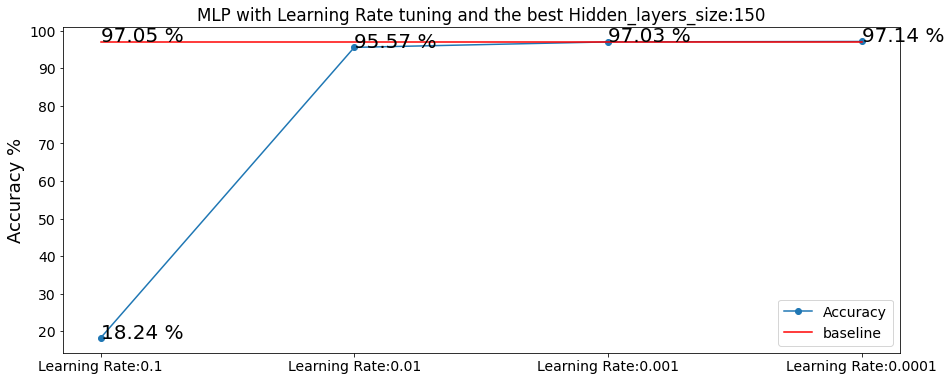

In [55]:
fig = plt.figure(figsize = (15, 6))
plt.plot(mlp2_lr,Q3_MLP2_accuracy_list, marker='o',label = 'Accuracy')
plt.plot(mlp2_lr , len(mlp2_lr)* [baselines[1]] , color = 'red',label = 'baseline')
plt.text(x=0 , y =baselines[1] , s="{:.2f} %".format(baselines[1]) , fontdict=dict(fontsize=20))  

for index,data in enumerate(Q3_MLP2_accuracy_list):
    plt.text(x=index , y =data , s="{:.2f} %".format(data) , fontdict=dict(fontsize=20))   
plt.legend()
plt.title(f'MLP with Learning Rate tuning and the best Hidden_layers_size:{best_hidden_layer_size}')
plt.ylabel("Accuracy %", fontsize=18)

plt.show()

> GB

In [56]:
Q3_GB2_accuracy_list = []
gb2_lr = []

In [57]:
for i in range(len(MLP_hidden_layer)):
    GB6 = GradientBoostingClassifier(n_estimators = best_n_estimators , learning_rate = GB_LR[i])
    gb2_lr.append(f'Leraning Rate:{GB_LR[i]}')
    #training the model
    GB6.fit(X_train, y_train)

    #Predicting the Test set results
    y_pred = GB6.predict(X_test)

    accuracy_GB6 = accuracy_score(y_test, y_pred)*100
    GB_estimators[accuracy_GB6] = GB6
    Q3_GB2_accuracy_list.append(accuracy_GB6)
    print(f'Accuracy of the model with learning rate {GB_LR[i]}: {accuracy_GB6:.2f}%')

Accuracy of the model with learning rate 0.1: 96.23%
Accuracy of the model with learning rate 0.01: 87.27%
Accuracy of the model with learning rate 0.001: 81.84%
Accuracy of the model with learning rate 0.0001: 63.31%


# Plotting

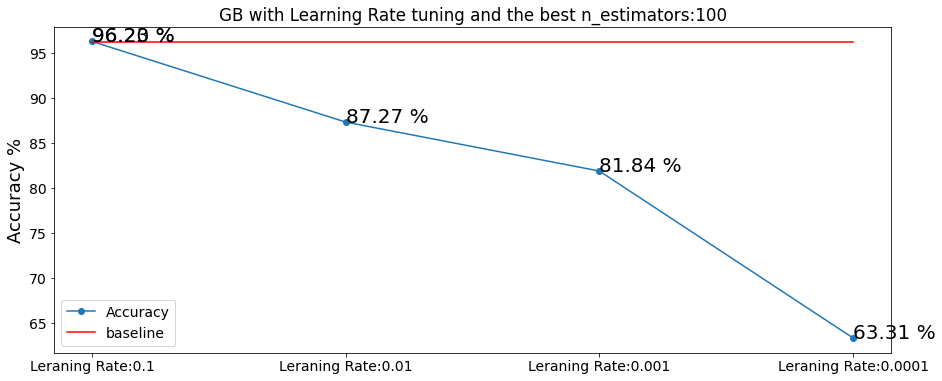

In [58]:
fig = plt.figure(figsize = (15, 6))
plt.plot(gb2_lr,Q3_GB2_accuracy_list, marker='o',label = 'Accuracy')
plt.plot(gb2_lr , len(gb2_lr)* [baselines[2]] , color = 'red',label = 'baseline')
plt.text(x=0 , y =baselines[2] , s="{:.2f} %".format(baselines[2]) , fontdict=dict(fontsize=20))  

for index,data in enumerate(Q3_GB2_accuracy_list):
    plt.text(x=index , y =data , s="{:.2f} %".format(data) , fontdict=dict(fontsize=20))   
plt.legend()
plt.title(f'GB with Learning Rate tuning and the best n_estimators:{best_n_estimators}')
plt.ylabel("Accuracy %", fontsize=18)

plt.show()

# New Baseline Accuracy

In [59]:
baselines3 = [max(max(Q3_DT1_accuracy_list),max(Q3_DT2_accuracy_list)) , max(max(Q3_MLP1_accuracy_list),max(Q3_MLP2_accuracy_list))  , max(max(Q3_GB1_accuracy_list),max(Q3_GB2_accuracy_list)) ]

# Question4

# Select the best 3 Estimators

In [60]:
DT_estimators

{91.9359450957964: DecisionTreeClassifier(),
 76.43694595367457: DecisionTreeClassifier(max_depth=5),
 90.9922790963683: DecisionTreeClassifier(max_depth=10),
 92.76522733771804: DecisionTreeClassifier(max_depth=15),
 91.85015727766657: DecisionTreeClassifier(max_depth=15),
 91.76436945953674: DecisionTreeClassifier(max_depth=15, min_samples_leaf=3),
 90.5919359450958: DecisionTreeClassifier(max_depth=15, min_samples_leaf=5),
 89.9342293394338: DecisionTreeClassifier(max_depth=15, min_samples_leaf=7)}

In [61]:
import operator
best_DT_Estimator = max(DT_estimators.items(), key = operator.itemgetter(0))[1]
best_DT_Estimator

DecisionTreeClassifier(max_depth=15)

In [62]:
MLP_estimators

{96.19674006291106: MLPClassifier(hidden_layer_sizes=50),
 96.82585072919645: MLPClassifier(hidden_layer_sizes=100),
 97.05461824420932: MLPClassifier(hidden_layer_sizes=150),
 96.45410351730054: MLPClassifier(hidden_layer_sizes=200),
 18.244209322276237: MLPClassifier(hidden_layer_sizes=150, learning_rate_init=0.1),
 95.56762939662568: MLPClassifier(hidden_layer_sizes=150, learning_rate_init=0.01),
 97.02602230483272: MLPClassifier(hidden_layer_sizes=150),
 97.14040606233915: MLPClassifier(hidden_layer_sizes=150, learning_rate_init=0.0001)}

In [63]:
best_MLP_Estimator = max(MLP_estimators.items(), key = operator.itemgetter(0))[1]
best_MLP_Estimator

MLPClassifier(hidden_layer_sizes=150, learning_rate_init=0.0001)

In [64]:
GB_estimators

{91.42121818701744: GradientBoostingClassifier(n_estimators=25),
 94.9957106090935: GradientBoostingClassifier(n_estimators=50),
 95.91078066914498: GradientBoostingClassifier(n_estimators=75),
 96.19674006291106: GradientBoostingClassifier(),
 96.22533600228768: GradientBoostingClassifier(),
 87.2748069774092: GradientBoostingClassifier(learning_rate=0.01),
 81.84157849585358: GradientBoostingClassifier(learning_rate=0.001),
 63.31140977981127: GradientBoostingClassifier(learning_rate=0.0001)}

In [65]:
best_GB_Estimator = max(GB_estimators.items(), key = operator.itemgetter(0))[1]
best_GB_Estimator

GradientBoostingClassifier()

# Stacking Strategy

In [66]:
estimators = [('DT' , best_DT_Estimator) , ('MLP' , best_MLP_Estimator) , ('GB' , best_GB_Estimator)]

In [67]:
#create the new model
stacking = StackingClassifier(estimators= estimators)
#training the model
stacking.fit(X_train, y_train)
#Predicting the Test set results
y_pred = stacking.predict(X_test)
#Calculate Accuracy
Stack_ACC = accuracy_score(y_test, y_pred)*100
print('Accuracy of the model: {:.2f} %' .format(Stack_ACC))

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy of the model: 96.97 %


# Random Forest

In [68]:
#create the new model
RF = RandomForestClassifier()
#training the model
RF.fit(X_train, y_train)
#Predicting the Test set results
y_pred = RF.predict(X_test)
#Calculate Accuracy
RF_ACC = accuracy_score(y_test, y_pred)*100
print('Accuracy of the model: {:.2f} %' .format(RF_ACC))

Accuracy of the model: 96.43 %


In [69]:
baselines4 = [Stack_ACC , RF_ACC]

# Plotting

In [70]:
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        if h>0:
            ax.text(rect.get_x()+rect.get_width()/2., h, '%.1f'%float(h) + '%',ha='center', va='bottom')

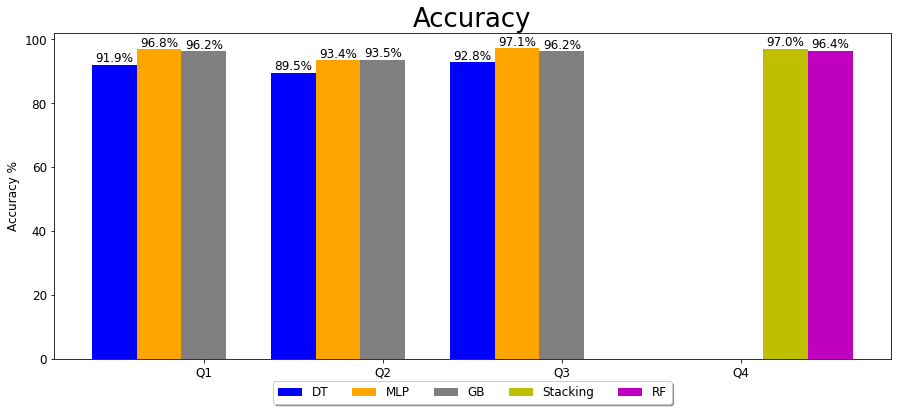

In [71]:
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize = (15, 6))
ax = fig.add_subplot(111)

MLs = ['DT', 'MLP', 'GB', 'Stacking','RF']
list_x_axis=['Q1','Q2','Q3','Q4']
DT_baselines = [baselines1[0] , baselines2[0],baselines3[0] , 0]
MLP_baselines = [baselines1[1] , baselines2[1],baselines3[1] , 0]
GB_baselines = [baselines1[2] , baselines2[2],baselines3[2] , 0]
Stack_baselines = [0 , 0 , 0 ,baselines4[0]]
RF_baselines = [0 , 0 , 0 ,baselines4[1]]

ind = np.arange(len(list_x_axis))  # the x locations for the groups
width = 0.25                   # the width of the bars
rects1 = ax.bar(ind-width   , DT_baselines, width=width, color='b', align='center')
rects2 = ax.bar(ind         , MLP_baselines, width=width, color='orange', align='center')
rects3 = ax.bar(ind+width   , GB_baselines, width=width, color='gray', align='center')
rects4 = ax.bar(ind+width*2 , Stack_baselines, width=width, color='y', align='center')
rects5 = ax.bar(ind+width*3 , RF_baselines , width=width, color='m', align='center')

ax.set_xticks(ind+width)
plt.title('Accuracy', fontsize=26)
ax.set_ylabel('Accuracy %')
ax.set_xticks(ind+width)
ax.set_xticklabels(list_x_axis)
ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]), MLs ,
          loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

plt.show()


# Confusion Matrix of the best 2 approaches
Best 2 approaches are: 
* MLP(Fine tuned)
* Stacking



Plotting Confusion Matrix:



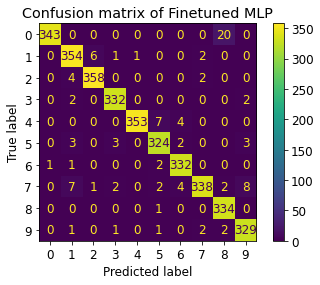

In [72]:
print('\nPlotting Confusion Matrix:\n' )
plot_confusion_matrix(best_MLP_Estimator, X_test, y_test,values_format="d")  
plt.title('Confusion matrix of Finetuned MLP')
plt.show()


Plotting Confusion Matrix:



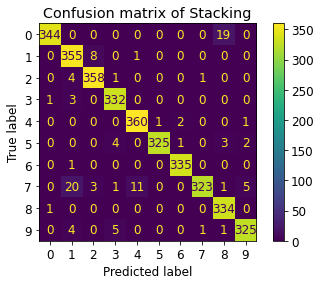

In [73]:
print('\nPlotting Confusion Matrix:\n' )
plot_confusion_matrix(stacking, X_test, y_test,values_format="d")  
plt.title('Confusion matrix of Stacking')
plt.show()